In [1]:
from fuzzy_art import *
import sklearn.datasets as ds
import sklearn.decomposition as dcp
import matplotlib.pyplot as plt

In [2]:
iris = ds.load_iris()
data = iris['data'] / np.max(iris['data'], axis=0)
label_true = iris['target']
# pca
pca = dcp.PCA(n_components=2)
pca_xy = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.92138578 0.05142129]
[4.9602239  1.17179601]


0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


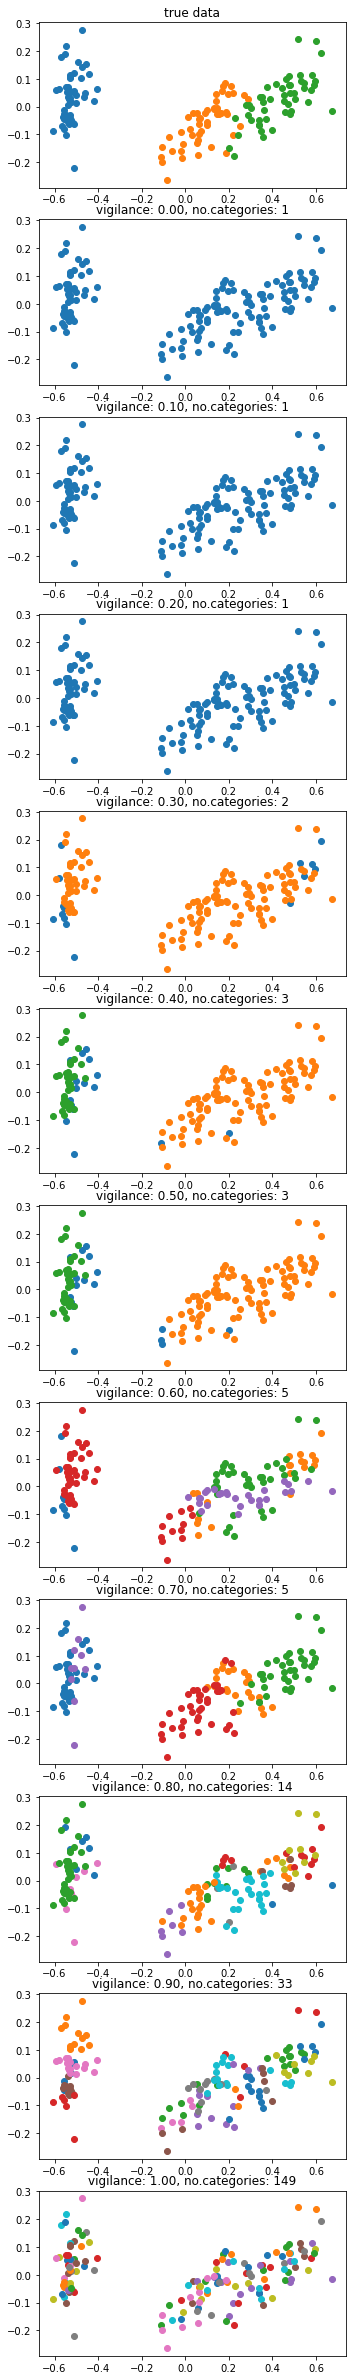

In [3]:
no_rho = 11
ls_rho = np.linspace(0, 1, no_rho)
fig, axs = plt.subplots(no_rho + 1, 1,
                        figsize = (5, ls_rho.size * 3))
fig.tight_layout()

# plot true
for cat_true in range(3):
    axs[0].scatter(*np.where(label_true == cat_true, pca_xy.T, None))
axs[0].set_title('true data')

# use FuzzyART
for rho, ax in zip(ls_rho, axs[1:]): 
    print(rho)
    # init
    net = FuzzyART(alpha=0.5, rho=rho)
    
    # train
    net.train(data, epochs=100) # each epoch, all data is shuffled
    label_pred = net.test(data).astype(int)

    # plot 
    for cat_pred in range(net.w.shape[0]):
        ax.scatter(*np.where(label_pred == cat_pred, pca_xy.T, None))
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, net.w.shape[0]))